# End-to-End Machine Learning Project
### Downloading and quick Look at the Data Structure

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("diabetes.csv")
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


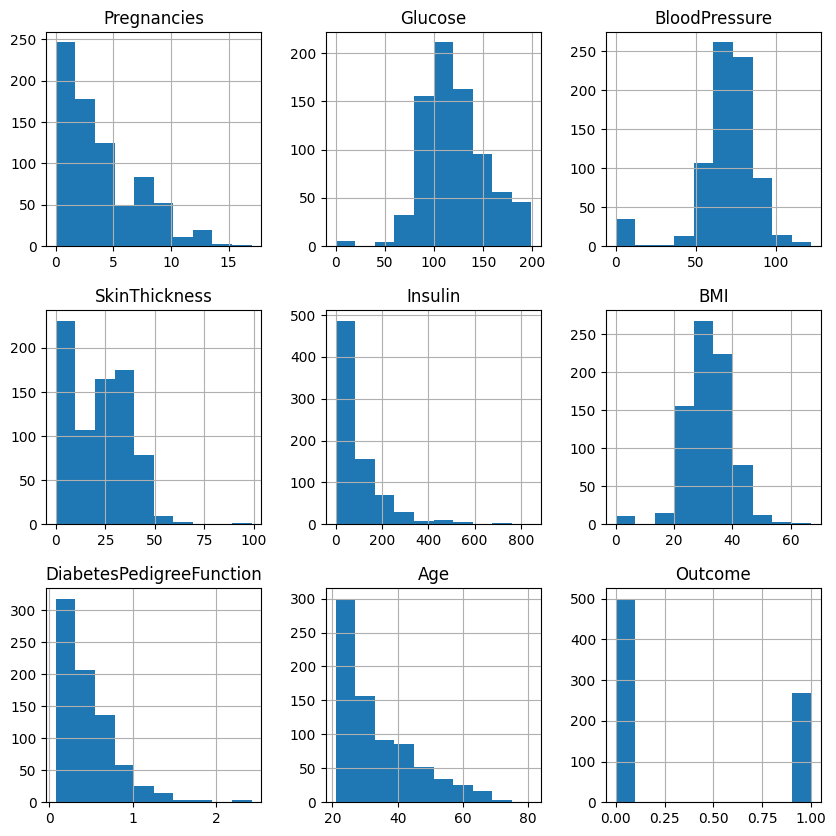

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(10,10))
plt.show()

### Create a Test Set

In [7]:
np.random.seed(13)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(data, 0.3)
len(train_set)

538

In [9]:
len(test_set)

230

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [12]:
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0        0            6      148             72             35        0  33.6   
 1        1            1       85             66             29        0  26.6   
 3        3            1       89             66             23       94  28.1   
 4        4            0      137             40             35      168  43.1   
 6        6            3       78             50             32       88  31.0   
 ..     ...          ...      ...            ...            ...      ...   ...   
 762    762            9       89             62              0        0  22.5   
 763    763           10      101             76             48      180  32.9   
 764    764            2      122             70             27        0  36.8   
 765    765            5      121             72             23      112  26.2   
 767    767            1       93             70             31        0  30.4   
 
      Diabetes

In [13]:
data = data.reset_index()
data_with_id["id"] = data["Glucose"] * 1000 + data["BloodPressure"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "id")
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0        0            6      148             72             35        0  33.6   
 1        1            1       85             66             29        0  26.6   
 3        3            1       89             66             23       94  28.1   
 4        4            0      137             40             35      168  43.1   
 5        5            5      116             74              0        0  25.6   
 ..     ...          ...      ...            ...            ...      ...   ...   
 757    757            0      123             72              0        0  36.3   
 762    762            9       89             62              0        0  22.5   
 765    765            5      121             72             23      112  26.2   
 766    766            1      126             60              0        0  30.1   
 767    767            1       93             70             31        0  30.4   
 
      Diabetes

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=13)
train_set, test_set

(     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 246    246           10      122             68              0        0  31.2   
 208    208            1       96             64             27       87  33.2   
 548    548            1      164             82             43       67  32.8   
 542    542           10       90             85             32        0  34.9   
 147    147            2      106             64             35      119  30.5   
 ..     ...          ...      ...            ...            ...      ...   ...   
 742    742            1      109             58             18      116  28.5   
 528    528            0      117             66             31      188  30.8   
 74      74            1       79             75             30        0  32.0   
 176    176            6       85             78              0        0  31.2   
 338    338            9      152             78             34      171  34.2   
 
      Diabetes

<AxesSubplot:>

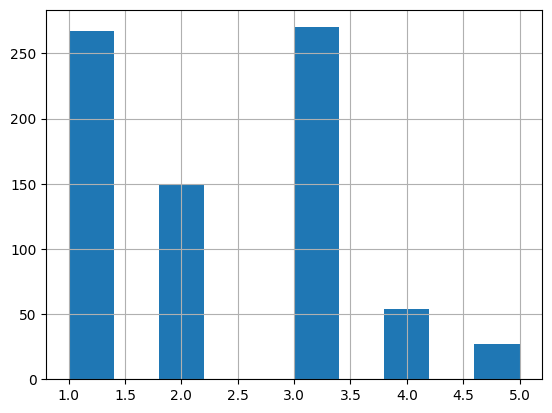

In [15]:

data["age_cat"] = pd.cut(data["Age"],bins=[1, 25, 30, 50, 60, np.inf],labels=[1, 2, 3, 4, 5])
data["age_cat"].hist()

In [16]:
data["age_cat"].value_counts()

3    270
1    267
2    150
4     54
5     27
Name: age_cat, dtype: int64

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit #83

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(data, data["age_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

1    0.350649
3    0.350649
2    0.194805
4    0.071429
5    0.032468
Name: age_cat, dtype: float64

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

### Visualizing Dependence of insulin levels on age

In [19]:
data = strat_train_set.copy()

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

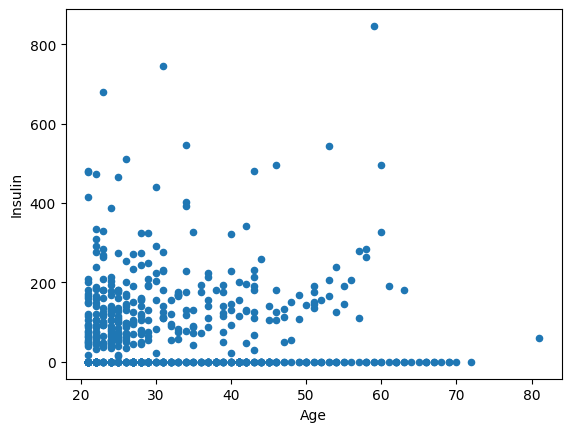

In [20]:
data.plot(kind="scatter", x="Age", y="Insulin")

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

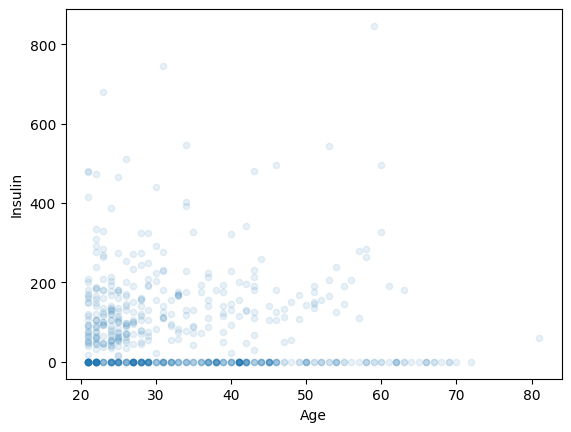

In [21]:
data.plot(kind="scatter", x="Age", y="Insulin", alpha=0.1)

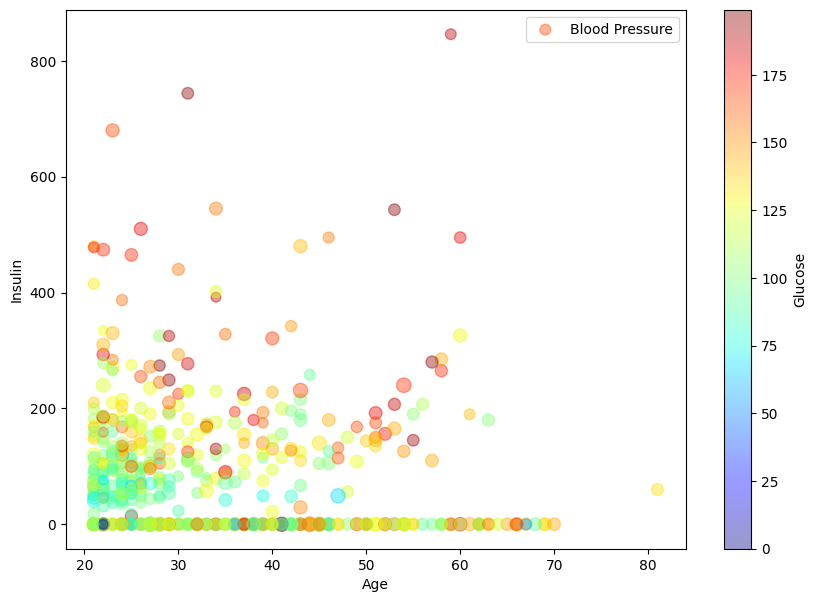

In [22]:
data.plot(kind="scatter", x="Age", y="Insulin", alpha=0.4, 
          s=data["BloodPressure"], label="Blood Pressure", figsize=(10,7), 
          c="Glucose", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

### Correlations

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix["Glucose"].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.459355
Insulin                     0.353836
Age                         0.255796
BMI                         0.215445
BloodPressure               0.156128
DiabetesPedigreeFunction    0.141546
Pregnancies                 0.113046
SkinThickness               0.063422
index                       0.010681
Name: Glucose, dtype: float64

array([[<AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='Glucose'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='Insulin', ylabel='BloodPressure'>,
        <AxesSubplot:xlabel='Age', ylabel='BloodPressure'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Insulin'>,
        <AxesSubplot:xlabel='Age', ylabel='Insulin'>],
       [<AxesSubplot:xlabel='Glucose', ylabel='Age'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Age'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

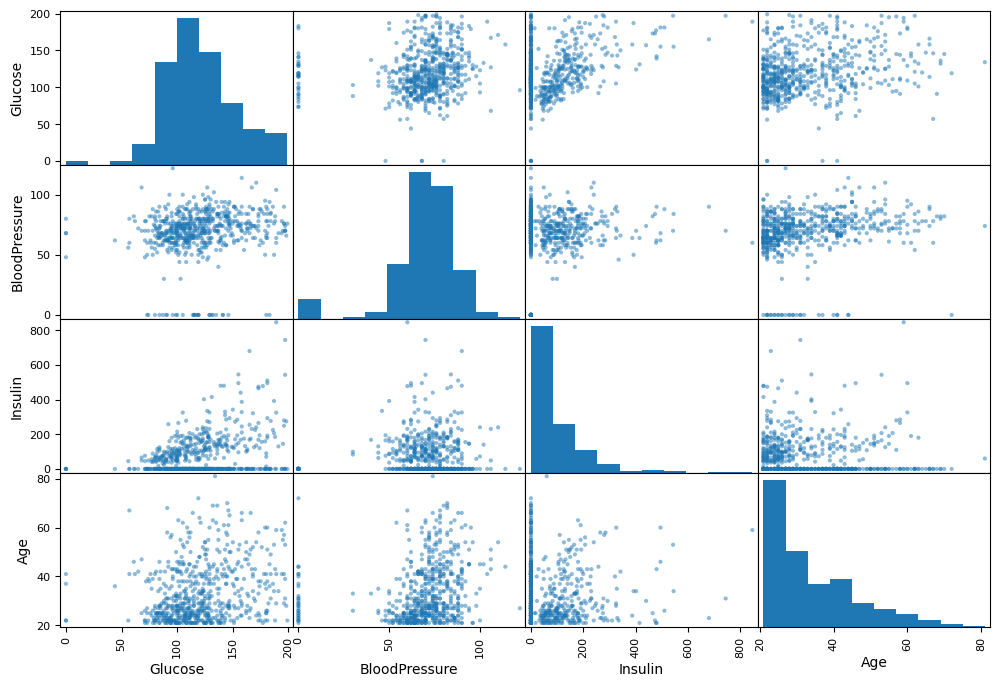

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["Glucose", "BloodPressure", "Insulin", "Age"]
scatter_matrix(data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

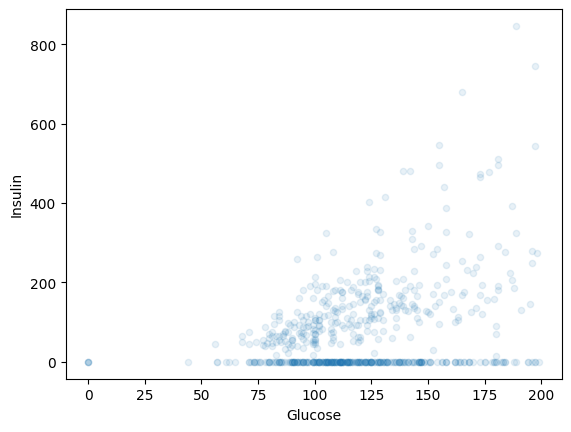

In [26]:
data.plot(kind="scatter", x="Glucose", y="Insulin", alpha=0.1)

### Attribute Combinations

In [27]:
data["GlucosePerInsulin"] = data["Glucose"] / data["Insulin"]
data["BloodPressurePerAge"] = data["BloodPressure"] / data["Age"]

corr_matrix = data.corr()
corr_matrix["Glucose"].sort_values(ascending=False)

Glucose                     1.000000
Outcome                     0.459355
Insulin                     0.353836
Age                         0.255796
BMI                         0.215445
BloodPressure               0.156128
DiabetesPedigreeFunction    0.141546
Pregnancies                 0.113046
SkinThickness               0.063422
index                       0.010681
BloodPressurePerAge        -0.081007
GlucosePerInsulin          -0.105027
Name: Glucose, dtype: float64

### Data Cleaning

In [28]:
data = strat_train_set.drop("Glucose", axis=1)
data_labels = strat_train_set["Glucose"].copy()

In [29]:
median = data["BloodPressure"].median()
data["BloodPressure"].fillna(median, inplace=True)

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [31]:
data_num = data.drop("Insulin", axis=1)
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([3.895e+02, 3.000e+00, 7.200e+01, 2.300e+01, 3.240e+01, 3.890e-01,
       2.900e+01, 0.000e+00])

In [33]:
data_num.median().values

array([3.895e+02, 3.000e+00, 7.200e+01, 2.300e+01, 3.240e+01, 3.890e-01,
       2.900e+01, 0.000e+00])

In [34]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)
data_tr.head()

,index,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
670,670.0,6.0,68.0,26.0,33.6,0.631,49.0,0.0
127,127.0,1.0,58.0,36.0,33.3,0.261,23.0,0.0
181,181.0,0.0,64.0,18.0,34.9,0.725,23.0,0.0
640,640.0,0.0,86.0,17.0,29.3,0.695,27.0,0.0
735,735.0,4.0,60.0,32.0,35.4,0.284,28.0,0.0


### Handling Text and Categorical Attributes

In [35]:
data_cat = data[["Pregnancies"]]
data_cat.head(10)

,Pregnancies
670,6
127,1
181,0
640,0
735,4
310,6
551,3
524,3
95,6
289,5


In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[6.],
       [1.],
       [0.],
       [0.],
       [4.],
       [6.],
       [3.],
       [3.],
       [6.],
       [5.]])

In [37]:
ordinal_encoder.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
       dtype=int64)]

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<614x17 sparse matrix of type '<class 'numpy.float64'>'
	with 614 stored elements in Compressed Sparse Row format>

In [39]:
data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [40]:
cat_encoder.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
       dtype=int64)]

### Custom Transformers

In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

insulin_ix, age_ix, glucose_ix, blood_pressure_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_insulin_per_age = True):
        self.add_insulin_per_age = add_insulin_per_age
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        insulin_per_blood_pressure = X[:, insulin_ix] / (X[:, blood_pressure_ix] + 1)
        age_per_glucose = X[:, age_ix] / (X[:, glucose_ix] + 1)
        if self.add_insulin_per_age:
            insulin_per_age = X[:, insulin_ix] / (X[:, age_ix] + 1)
            return np.c_[X, insulin_per_blood_pressure, age_per_glucose, insulin_per_age]
        else:
            return np.c_[X, insulin_per_blood_pressure, age_per_glucose]

attr_adder = CombinedAttributesAdder(add_insulin_per_age=False)
data_extra_attribs = attr_adder.transform(data.values)
data_extra_attribs

array([[670.        ,   6.        ,  68.        , ...,   0.        ,
         15.9411404 ,   4.85549133],
       [127.        ,   1.        ,  58.        , ...,   0.        ,
         28.54877082,   2.74052478],
       [181.        ,   0.        ,  64.        , ...,   0.        ,
         10.43478261,   2.56267409],
       ...,
       [722.        ,   1.        ,  68.        , ...,   1.        ,
         21.49740549,   4.19141914],
       [555.        ,   7.        ,  70.        , ...,   0.        ,
         28.42377261,   8.11320755],
       [251.        ,   2.        ,  84.        , ...,   0.        ,
          0.        ,   0.        ]])

### Transformation Pipelines

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
data_num_tr = num_pipeline.fit_transform(data_num)
data_num_tr

array([[ 1.2672246 ,  0.6317475 , -0.0582959 , ..., -0.29415503,
        -0.29155895,  0.10938385],
       [-1.17610239, -0.84876   , -0.57629419, ...,  1.46606364,
         0.60519499,  0.40581324],
       [-0.93311959, -1.1448615 , -0.26549522, ...,  0.11895752,
        -0.34854072, -0.13925246],
       ...,
       [ 1.50120803, -0.84876   , -0.0582959 , ..., -0.01679736,
        -0.11875872,  0.3138699 ],
       [ 0.74976124,  0.927849  ,  0.04530376, ...,  0.33165848,
        -0.08107217,  0.60042524],
       [-0.6181419 , -0.5526585 ,  0.77050137, ..., -1.22814861,
        -0.10531361, -0.63780588]])

In [161]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["Age"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
data_prepared = full_pipeline.fit_transform(data)

### Training and Evaluating on the Training Set

In [163]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [164]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [134.42766719 103.88639762 108.09136643 110.02015227 111.42064797]
Labels: [165, 118, 119, 102, 95]


In [166]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25.974113266665682

In [168]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)

data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [169]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [170]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [45.47704135 37.11381796 42.21966367 39.23666817 43.67803214 33.79543087
 35.20059612 32.05349013 47.16104255 37.37273487]
Mean: 39.330851783036564
Standard deviation: 4.8553987004272825


In [171]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [31.15599016 30.51006179 29.72840735 25.35912457 29.09687858 25.23963177
 27.44322708 23.29504817 49.02871776 32.12264396]
Mean: 30.297973118711344
Standard deviation: 6.8109324005767995


In [174]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.5993423678982

In [176]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [31.45256498 27.87883285 28.63721659 29.02791129 26.88118344 25.23842679
 27.83022605 24.48358714 35.77708615 30.70267383]
Mean: 28.790970910712844
Standard deviation: 3.101624053355697


### Grid Search

In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [178]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [179]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [180]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33.720004471476784 {'max_features': 2, 'n_estimators': 3}
29.801996228580336 {'max_features': 2, 'n_estimators': 10}
28.94443956382004 {'max_features': 2, 'n_estimators': 30}
34.05577532193328 {'max_features': 4, 'n_estimators': 3}
30.24701624739073 {'max_features': 4, 'n_estimators': 10}
28.853189067332245 {'max_features': 4, 'n_estimators': 30}
32.23061938562024 {'max_features': 6, 'n_estimators': 3}
30.104038073930507 {'max_features': 6, 'n_estimators': 10}
28.75869610750326 {'max_features': 6, 'n_estimators': 30}
33.42368132598529 {'max_features': 8, 'n_estimators': 3}
29.454577051616567 {'max_features': 8, 'n_estimators': 10}
28.58107386439947 {'max_features': 8, 'n_estimators': 30}
33.42309146723495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
30.32884283730906 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
33.122772051025834 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
30.035866970642427 {'bootstrap': False, 'max_features': 3, 'n_estimato

### Evaluate System on the Test Set

In [184]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Glucose", axis=1)
y_test = strat_test_set["Glucose"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

29.743724282596723

In [185]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([25.1746153 , 33.69891709])